In [1]:
import os
import pandas as pd

# Initialize an empty list to store dataframes
dataframes = []
numberoffile = 0
filesused = 0
filesdiscarded = 0

# Define the root directory containing the folders with CSV files
root_directory = '/kaggle/input/vape-and-juul-tweet-dataset/'

# Walk through the dataset directory and read all CSV files in each folder
for dirname, _, filenames in os.walk(root_directory):
    for filename in filenames:
        if filename.endswith('.csv'):
            # Construct the full file path
            file_path = os.path.join(dirname, filename)
            numberoffile += 1
            try:
                # Read the CSV file with a general encoding and handle bad lines
                df = pd.read_csv(file_path, encoding='latin1', on_bad_lines='warn')
                dataframes.append(df)
                filesused += 1
            except pd.errors.ParserError as e:
                filesdiscarded += 1
                pass
            except Exception as e:
                pass

# Combine all dataframes into one, if there are any successfully read
if dataframes:
    tweets_df = pd.concat(dataframes, ignore_index=True)
else:
    tweets_df = pd.DataFrame()  # Empty DataFrame if no data is read
# Keep only the 'TweetContent' column
tweets_df = tweets_df[['TweetContent']]
# Check the combined dataframe
print(tweets_df.head())
print("Some Statistics:")
print(f'Total number of tweets loaded: {len(tweets_df)}')
print(f'Total files processed: {numberoffile}')
print(f'Total files used: {filesused}')
print(f'Total files discarded: {filesdiscarded}')
del numberoffile, filesused, filesdiscarded, df, dataframes

                                        TweetContent
0  Where were you when racism ended ? I was right...
1        jaehyun looks like he smells like juul pods
2  if johnny had a juul the scent would be one of...
3  My new toy the @sourcevapes ORB just came in t...
4  Hey @iilluminaughtii I love your videos I thou...
Some Statistics:
Total number of tweets loaded: 9555247
Total files processed: 3311
Total files used: 3163
Total files discarded: 148


# Let's see what are the top common hashtags in these tweets

Top 10 Hashtags:
         Hashtag    Count
4          #vape  1056767
32       #vaping   623374
14     #vapelife   310241
23         #ecig   295943
158        #Vape   248682
45      #vapefam   211094
97        #ecigs   201530
44       #vapeon   152637
61       #ejuice   142061
47   #vapenation   129154


<Figure size 1000x600 with 0 Axes>

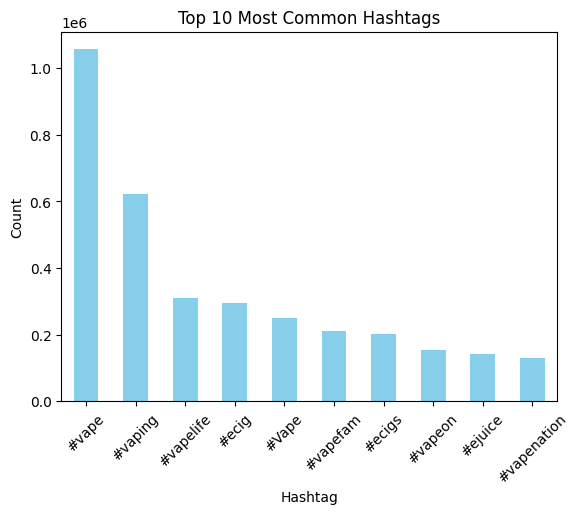

In [2]:
import re
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

# Sample dataframe with tweets
tweets = tweets_df['TweetContent'].astype(str).fillna('')  # Convert to string and handle NaN values

# Function to extract hashtags using regex
def extract_hashtags(tweet):
    return re.findall(r'#\w+', tweet)

# Extract all hashtags from the dataset
all_hashtags = []
for tweet in tweets:
    all_hashtags.extend(extract_hashtags(tweet))

# Count the occurrences of each hashtag
hashtag_counts = Counter(all_hashtags)

# Convert to a DataFrame for easier plotting
hashtag_df = pd.DataFrame(hashtag_counts.items(), columns=['Hashtag', 'Count'])

# Sort the DataFrame by count (descending order)
hashtag_df = hashtag_df.sort_values(by='Count', ascending=False)

# Display the top 10 most common hashtags
print("Top 10 Hashtags:")
print(hashtag_df.head(10))

# Plot the distribution of the top 10 hashtags
plt.figure(figsize=(10, 6))
hashtag_df.head(10).plot(kind='bar', x='Hashtag', y='Count', legend=False, color='skyblue')
plt.title('Top 10 Most Common Hashtags')
plt.xlabel('Hashtag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Text Preprocessing
Common preprocessing steps for tweet data include:

- Lowercasing: Convert all text to lowercase.
- Removing URLs: Eliminate any URLs from the text.
- Removing mentions and hashtags: Remove Twitter handles (e.g., @username) and hashtags.
- Removing special characters and punctuation: Clean up the text by removing unwanted characters.
- Tokenization: Split the text into individual words (tokens).
- Removing stop words: Remove common words that may not contribute to sentiment (e.g., "the", "is").

# Basic Statistics
After preprocessing, we can look at:

- The total number of tweets.
- The distribution of tweet lengths.
- The most common words used.

In [3]:
import os
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
import nltk

# Download stopwords if you haven't already
nltk.download('stopwords')

# Define the set of stopwords
stop_words = set(stopwords.words('english'))

# Updated text preprocessing function
def preprocess_tweet(tweet):
    if isinstance(tweet, str):  # Check if tweet is a string
        # Convert to lowercase
        tweet = tweet.lower()
        # Remove URLs
        tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
        # Remove mentions and hashtags
        tweet = re.sub(r'@\w+|#\w+', '', tweet)
        # Remove stopwords
        tweet = ' '.join(word for word in tweet.split() if word not in stop_words)
        # Remove special characters and punctuation
        tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
        return tweet.strip()
    return ''  # Return empty string for NaN values

# Apply preprocessing to the TweetContent column
tweets_df['CleanedTweet'] = tweets_df['TweetContent'].apply(preprocess_tweet)

# Count the number of empty or zero-length tweets
empty_tweets_count = (tweets_df['CleanedTweet'].str.len() == 0).sum()

# Print the number of empty tweets
print(f'Number of empty or zero-length tweets: {empty_tweets_count}')

# Remove empty or zero-length tweets from the DataFrame
tweets_df = tweets_df[tweets_df['CleanedTweet'].str.len() > 2]

# Basic Statistics
num_tweets = len(tweets_df)
tweets_df['TweetLength'] = tweets_df['CleanedTweet'].str.len()

# Print basic statistics
print(f'Total number of tweets after removing empty ones: {num_tweets}')
print(f'Mean tweet length: {tweets_df["TweetLength"].mean()} characters')
print(f'Max tweet length: {tweets_df["TweetLength"].max()} characters')
print(f'Min tweet length: {tweets_df["TweetLength"].min()} characters')
del stop_words, num_tweets, empty_tweets_count


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Number of empty or zero-length tweets: 15119
Total number of tweets after removing empty ones: 9537830
Mean tweet length: 57.70038509807787 characters
Max tweet length: 508 characters
Min tweet length: 3 characters


# Explore Vape tweets with some Visualizations
to get more information about the data we have we are doing some data visualizations.
- Histogram: Shows the distribution of tweet lengths.
- Bar Chart: Illustrates the top 10 most common words.


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


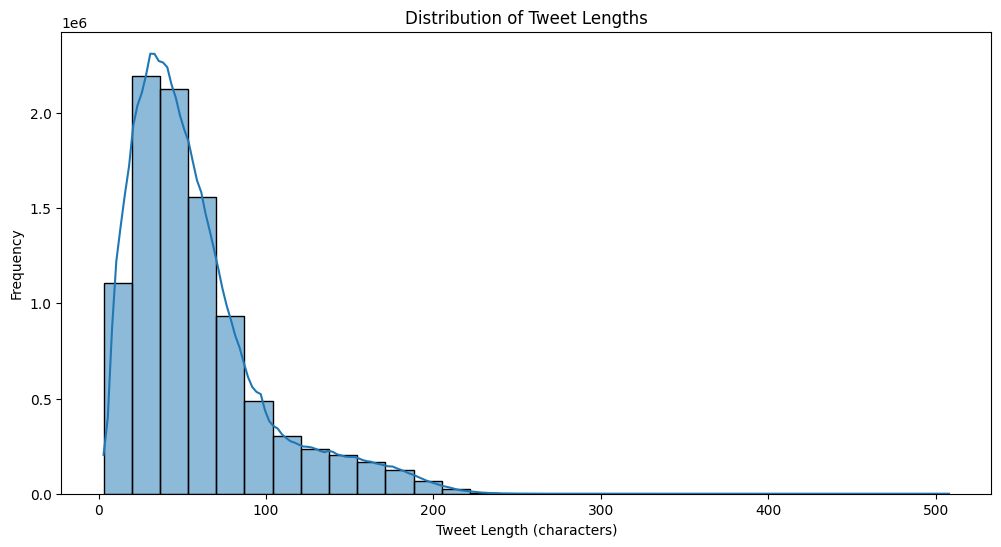

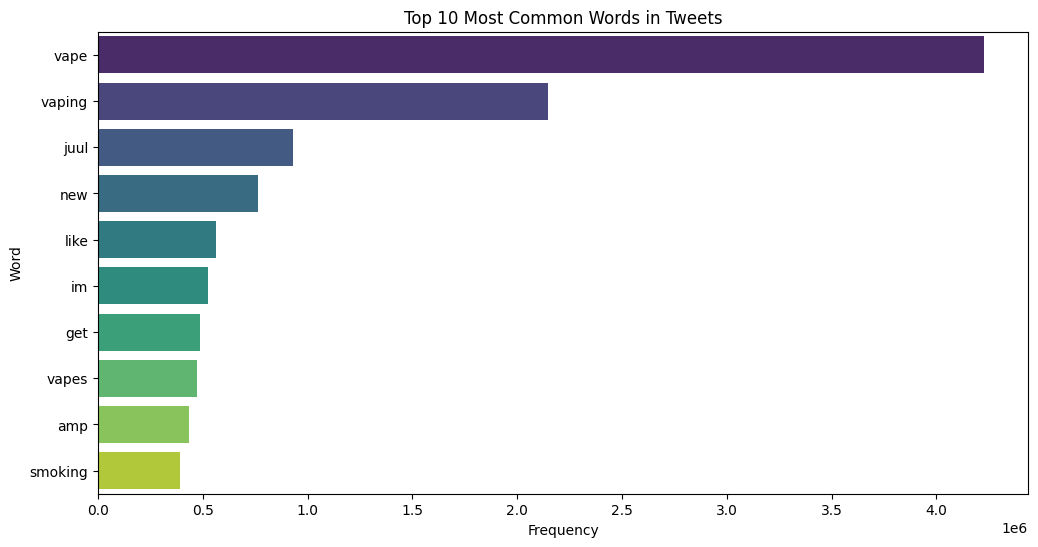

In [4]:
# Visualizations
plt.figure(figsize=(12, 6))
sns.histplot(tweets_df['TweetLength'], bins=30, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length (characters)')
plt.ylabel('Frequency')
plt.show()

# Top 10 most common words
text = ' '.join(tweets_df['CleanedTweet'])
words = text.split()
common_words = Counter(words).most_common(10)

# Create DataFrame for common words
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

# Bar chart for common words
plt.figure(figsize=(12, 6))
sns.barplot(x='Frequency', y='Word', data=common_words_df, palette='viridis')
plt.title('Top 10 Most Common Words in Tweets')
plt.show()
del text, words, common_words

# Draw word cloud of the the tweets
here we first list the top frequent words (500) in the whole tweets, then we draw them using word cloud

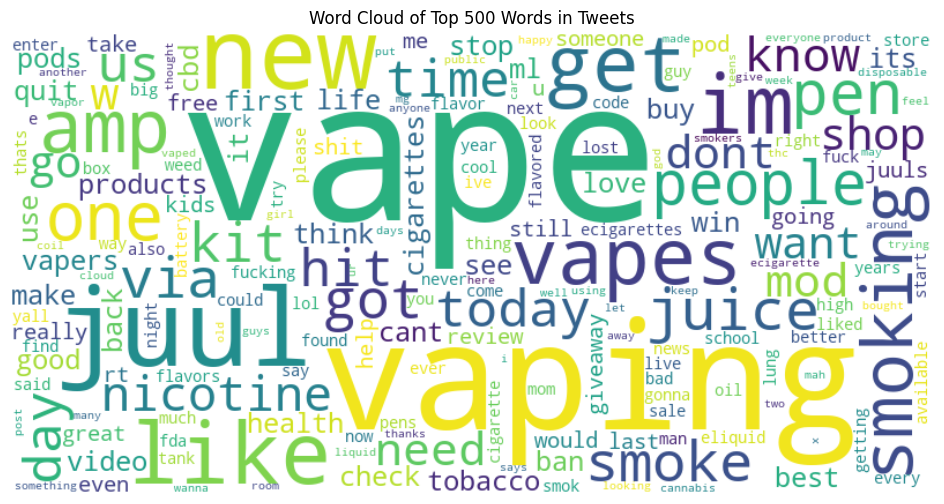

In [5]:
# Tokenize the CleanedTweet column into individual words
words = ' '.join(tweets_df['CleanedTweet']).split()

# Count the frequency of each word
word_counts = Counter(words)

# Get the top 500 most common words
top_500_words = dict(word_counts.most_common(500))

# Generate word cloud from the top 500 words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_500_words)

# Plot the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top 500 Words in Tweets')
plt.show()

del words, word_counts, top_500_words, wordcloud

In [6]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 5.0 MB/s eta 0:00:00


# Label all Vape tweets using VADER
VADER (Valence Aware Dictionary and sEntiment Reasoner) is a pre-built sentiment analysis model which is designed for social media text.

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to categorize sentiment based on VADER's compound score
def get_sentiment_label(compound_score):
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply VADER sentiment analysis to the CleanedTweet column
tweets_df['SentimentScore'] = tweets_df['CleanedTweet'].apply(lambda tweet: analyzer.polarity_scores(tweet)['compound'])

# Apply the get_sentiment_label function to create a 'SentimentLabel' column
tweets_df['SentimentLabel'] = tweets_df['SentimentScore'].apply(get_sentiment_label)

# Print out the labeled tweets for verification
print(tweets_df[['CleanedTweet', 'SentimentScore', 'SentimentLabel']].head())

# Summary of sentiment labels
print(tweets_df['SentimentLabel'].value_counts())
del analyzer

                                        CleanedTweet  SentimentScore  \
0  racism ended  right bro right front taking sic...         -0.8126   
1           jaehyun looks like smells like juul pods          0.6124   
2  johnny juul scent would one intoxicating obnox...         -0.4588   
3  new toy orb came time test drive puppy so lung...         -0.3744   
4  hey love videos thought might appreciate cring...          0.7845   

  SentimentLabel  
0       negative  
1       positive  
2       negative  
3       negative  
4       positive  
SentimentLabel
neutral     3732734
positive    3458808
negative    2346288
Name: count, dtype: int64


# Subsample Vape Tweets from Each class becuase it's too big
The dataset is too big and running it with SVM and some other machine learning models took a long time. Also sampling ensures fair distribution of each sentiment.

In [8]:
# Sample equal number of tweets from each class
min_class_size=100000
neutral_sample = tweets_df[tweets_df['SentimentLabel'] == 'neutral'].sample(n=min_class_size, random_state=42)
positive_sample = tweets_df[tweets_df['SentimentLabel'] == 'positive'].sample(n=min_class_size, random_state=42)
negative_sample = tweets_df[tweets_df['SentimentLabel'] == 'negative'].sample(n=min_class_size, random_state=42)
# Concatenate the samples to create a balanced dataset
balanced_df = pd.concat([neutral_sample, positive_sample, negative_sample])

# Shuffle the dataframe to mix the classes
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
del neutral_sample, positive_sample, negative_sample, tweets_df

**

# Apply Logistic Regression (LR) to classify vape tweets
- Pros: Simple, fast, and often provides good results for text classification.
- Cons: May struggle with highly complex or nuanced data.
- How to Apply: Convert your tweets to TF-IDF features and use them to train an LR model.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9152833333333333
              precision    recall  f1-score   support

    negative       0.92      0.88      0.90     19964
     neutral       0.89      0.97      0.93     19953
    positive       0.94      0.89      0.91     20083

    accuracy                           0.92     60000
   macro avg       0.92      0.92      0.91     60000
weighted avg       0.92      0.92      0.91     60000



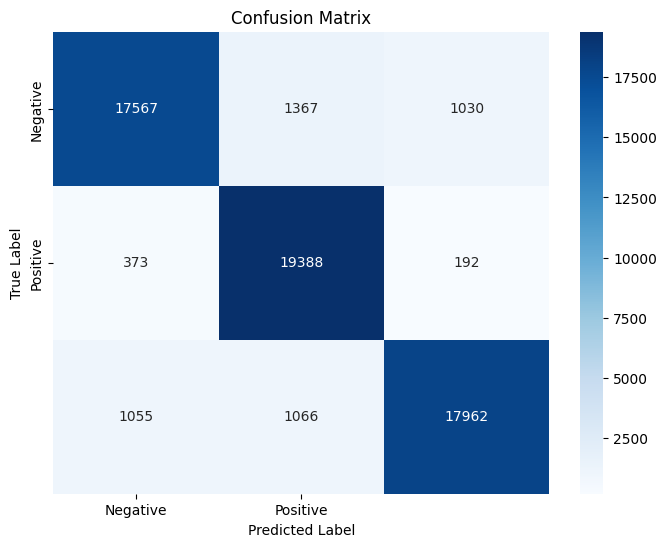

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(balanced_df['CleanedTweet'], balanced_df['SentimentLabel'], test_size=0.2, random_state=42)

# Convert tweets to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Logistic Regression classifier
lr = LogisticRegression()
lr.fit(X_train_tfidf, y_train)

# Predict on test set and evaluate
y_pred = lr.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

#  Sample Tweet
Let’s take this tweet:

- **"I can't believe how much better my breathing has been since I switched from smoking to vaping. It’s such a relief!"**

# Now Preprocess the Tweet
- Lowercasing: "i can't believe how much better my breathing has been since i switched from smoking to vaping. it’s such a relief!"
- Removing stopwords: "can't believe much better breathing switched smoking vaping relief"
- Removing punctuation and special characters: "cant believe much better breathing switched smoking vaping relief"
# Convert to TF-IDF Features and Run Logistic model
After preprocessing, we convert the tweet into numerical features using TF-IDF, which the Logistic Regression model can work with.

In [10]:
# Example of TF-IDF transformation for a single tweet
sample_tweet = ["cant believe much better breathing switched smoking vaping relief"]

# Apply the same TF-IDF vectorizer used in training
sample_tweet_tfidf = vectorizer.transform(sample_tweet)
# Predict the sentiment of the tweet using the trained model
predicted_label = lr.predict(sample_tweet_tfidf)

# Print the predicted sentiment
if predicted_label == 0:
    print("Sentiment: Negative")
elif predicted_label == 1:
    print("Sentiment: Neutral")
else:
    print("Sentiment: Positive")
del lr, sample_tweet_tfidf, predicted_label

Sentiment: Positive


# Naive Bayes (NB) Implementation
For text classification tasks, Multinomial Naive Bayes is often used, especially when the features are word frequencies or TF-IDF scores.

Naive Bayes Accuracy: 0.78945
Naive Bayes Classification Report:
               precision    recall  f1-score   support

    negative       0.71      0.86      0.78     19964
     neutral       0.86      0.74      0.79     19953
    positive       0.83      0.77      0.80     20083

    accuracy                           0.79     60000
   macro avg       0.80      0.79      0.79     60000
weighted avg       0.80      0.79      0.79     60000



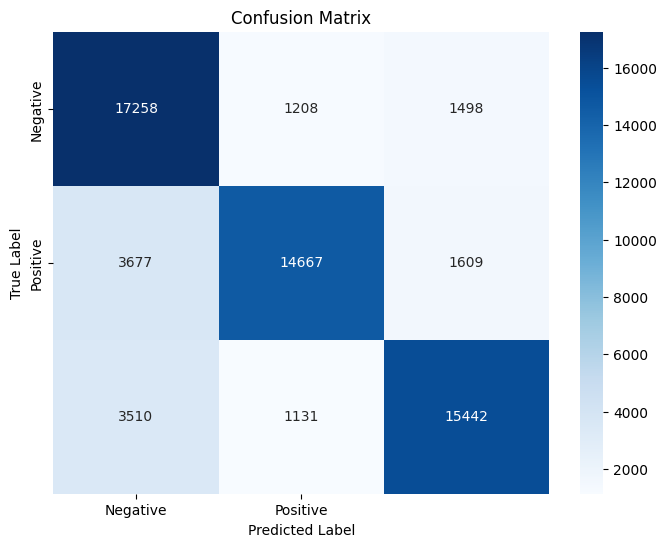

In [11]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Train Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_nb = nb.predict(X_test_tfidf)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_nb)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
del nb, y_pred_nb

# K-Nearest Neighbors (KNN) Implementation
For KNN, you'll need to use the KNeighborsClassifier. KNN tends to be slower for large datasets since it computes distances between all points, so it’s not always the best option for very large datasets. However, it's a simple and interpretable model.

KNN Accuracy: 0.5726333333333333
KNN Classification Report:
               precision    recall  f1-score   support

    negative       0.84      0.40      0.54     19964
     neutral       0.45      0.94      0.61     19953
    positive       0.90      0.38      0.53     20083

    accuracy                           0.57     60000
   macro avg       0.73      0.57      0.56     60000
weighted avg       0.73      0.57      0.56     60000



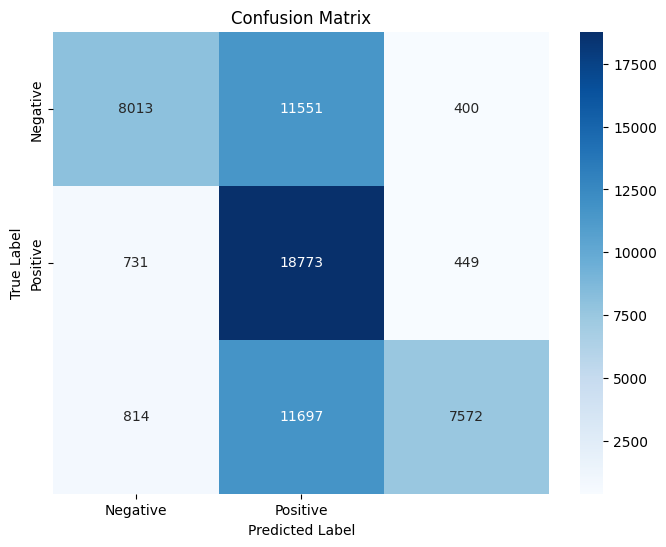

In [12]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors
knn.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_knn = knn.predict(X_test_tfidf)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("KNN Classification Report:\n", classification_report(y_test, y_pred_knn))
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
del knn, y_pred_knn

# Decision Trees:
They are easy to interpret and visualize.
They handle both numerical and categorical data well.
They don't require much preprocessing, such as scaling features.
Disadvantages:
They tend to overfit, especially on noisy data.
Decision trees may not perform as well as other classifiers like Random Forest or SVM on text data.

Decision Tree Accuracy: 0.8362833333333334
Decision Tree Classification Report:
               precision    recall  f1-score   support

    negative       0.83      0.80      0.81     19964
     neutral       0.84      0.89      0.86     19953
    positive       0.85      0.82      0.83     20083

    accuracy                           0.84     60000
   macro avg       0.84      0.84      0.84     60000
weighted avg       0.84      0.84      0.84     60000



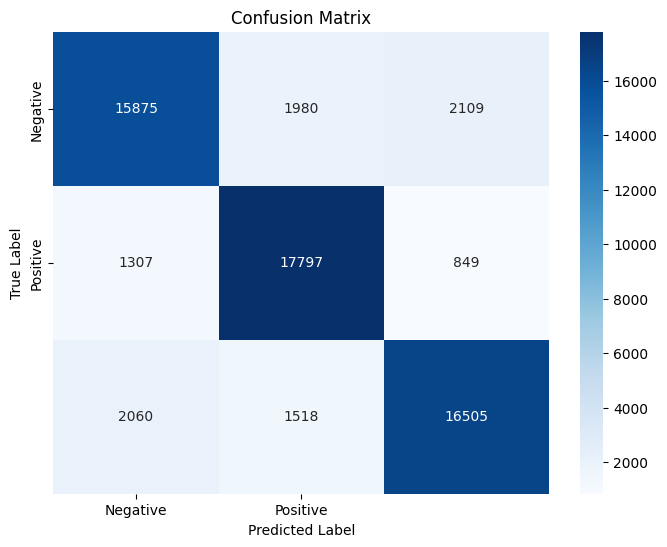

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_dt = dt.predict(X_test_tfidf)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
del dt, y_pred_dt

# Random Forests
- Pros: Robust and less likely to overfit, can handle noise and imbalanced data.
- Cons: Can be slow to train on large datasets.

Accuracy: 0.8805833333333334
              precision    recall  f1-score   support

    negative       0.88      0.84      0.86     19964
     neutral       0.86      0.95      0.90     19953
    positive       0.91      0.85      0.88     20083

    accuracy                           0.88     60000
   macro avg       0.88      0.88      0.88     60000
weighted avg       0.88      0.88      0.88     60000



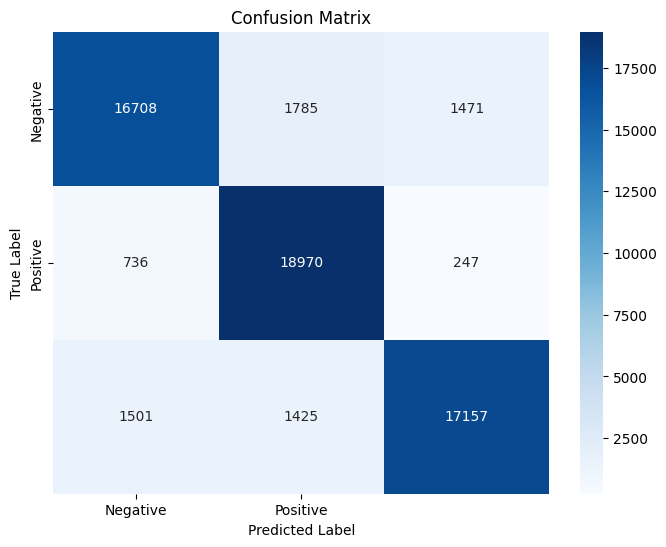

In [14]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
del rf,y_pred_rf

# Support Vector Machines (SVM)
- Pros: Works well for text classification, particularly with a large number of features (e.g., TF-IDF).
- Cons: Can be slower to train and may not work well with highly imbalanced datasets.

Accuracy: 0.9228166666666666
              precision    recall  f1-score   support

    negative       0.93      0.89      0.91     19964
     neutral       0.90      0.98      0.94     19953
    positive       0.94      0.90      0.92     20083

    accuracy                           0.92     60000
   macro avg       0.92      0.92      0.92     60000
weighted avg       0.92      0.92      0.92     60000



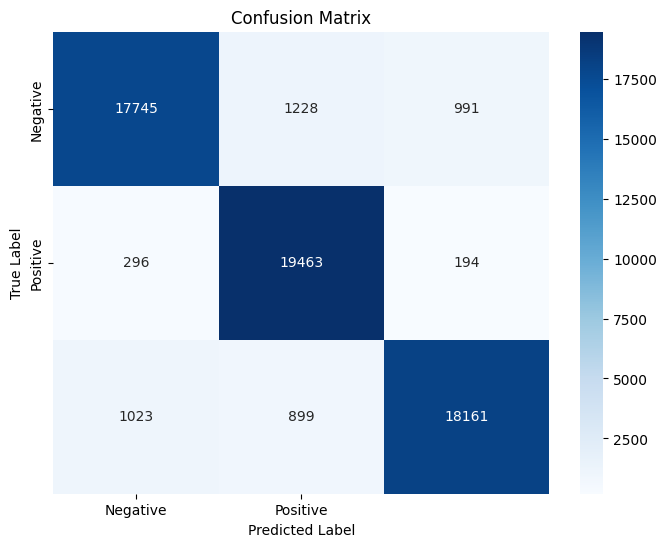

In [15]:
from sklearn.svm import SVC

# Train SVM classifier
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)
 
# Predict and evaluate
y_pred_sv= svm.predict(X_test_tfidf)
print("Accuracy:", accuracy_score(y_test, y_pred_sv))
print(classification_report(y_test, y_pred_sv))
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_sv)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
del svm

In [16]:
!pip install transformers datasets

# Deep Learning Models
For large datasets like yours (with millions of tweets), deep learning models often perform better than traditional machine learning approaches. These models can automatically learn complex patterns in text without requiring manual feature engineering.

# a) Recurrent Neural Networks (RNNs) / LSTMs
- Pros: Good for capturing sequential dependencies in text.
- Cons: Can be slow to train, and performance can degrade with long sequences.
You can use pre-trained word embeddings (e.g., GloVe or Word2Vec) to represent your tweets as input vectors for the LSTM.

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Load the dataset
tweets = balanced_df['CleanedTweet'].values
labels = balanced_df['SentimentLabel'].values

# Preprocess the labels
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)  # Convert to numerical labels (e.g., 0, 1)

# Split the dataset into training and testing sets
X_train, X_val, y_train, y_val = train_test_split(tweets, labels, test_size=0.2, random_state=42)

# Tokenize and pad the sequences
max_words = 10000  # Vocabulary size
max_len = 100  # Max tweet length

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len)

# Build the model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_pad, y_train, epochs=20, batch_size=32, validation_data=(X_val_pad, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_val_pad, y_val)
print(f'Validation Accuracy: {accuracy:.2f}')


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 326s 43ms/step - accuracy: 0.5000 - loss: -27.4640 - val_accuracy: 0.5958 - val_loss: -122.1638
Epoch 2/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 326s 43ms/step - accuracy: 0.5828 - loss: -154.9262 - val_accuracy: 0.6038 - val_loss: -248.6149
Epoch 3/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 327s 44ms/step - accuracy: 0.5934 - loss: -286.2726 - val_accuracy: 0.6057 - val_loss: -377.5433
Epoch 4/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 379s 43ms/step - accuracy: 0.6018 - loss: -423.7228 - val_accuracy: 0.6200 - val_loss: -511.3481
Epoch 5/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 327s 44ms/step - accuracy: 0.6094 - loss: -558.9683 - val_accuracy: 0.6179 - val_loss: -640.6837
Epoch 6/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 385s 44ms/step - accuracy: 0.6191 - loss: -695.3011 - val_accuracy: 0.6200 - val_loss: -769.9900
Epoch 7/20
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 330s 44ms/step - accuracy: 0.6193 - loss: -837.0745 - val_accuracy: 0.6143 - val_loss: -896.8437
Epoch 8/20
7500/7500 ━━━━━━━